In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF DONE

In [2]:
env='InvertedPendulum-v4'
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
print(df_comper.shape)

(60963, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(77709, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedPendulum-v4,12-09-2023 00:13:02,13,0,13,0.000646,1,14,True,13,13.000000,13.000000,13.000000,13.000000,COMPER
1,1,2,InvertedPendulum-v4,12-09-2023 00:13:06,18,0,18,0.000895,2,6,True,5,9.000000,9.000000,9.000000,9.000000,COMPER
2,1,3,InvertedPendulum-v4,12-09-2023 00:13:10,23,0,23,0.001143,3,6,True,5,7.666667,7.666667,7.666667,7.666667,COMPER
3,1,4,InvertedPendulum-v4,12-09-2023 00:13:13,27,0,27,0.001342,4,5,True,4,6.750000,6.750000,6.750000,6.750000,COMPER
4,1,5,InvertedPendulum-v4,12-09-2023 00:13:16,31,0,31,0.001541,5,5,True,4,6.200000,6.200000,6.200000,6.200000,COMPER


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedPendulum-v4,02-10-2023 18:21:19,32,33,0,0.001591,1,33,True,32,32.000000,32.000000,32.000000,32.000000,DDPG
1,1,2,InvertedPendulum-v4,02-10-2023 18:21:21,46,47,0,0.002286,2,15,True,14,23.000000,23.000000,23.000000,23.000000,DDPG
2,1,3,InvertedPendulum-v4,02-10-2023 18:21:22,56,57,0,0.002783,3,11,True,10,18.666667,18.666667,18.666667,18.666667,DDPG
3,1,4,InvertedPendulum-v4,02-10-2023 18:21:23,64,65,0,0.003181,4,9,True,8,16.000000,16.000000,16.000000,16.000000,DDPG
4,1,5,InvertedPendulum-v4,02-10-2023 18:21:24,72,73,0,0.003579,5,9,True,8,14.400000,14.400000,14.400000,14.400000,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedPendulum-v4,12-09-2023 00:13:02,13,0,13,0.000646,1,14,True,13,13.000000,13.000000,13.000000,13.000000,COMPER
1,1,2,InvertedPendulum-v4,12-09-2023 00:13:06,18,0,18,0.000895,2,6,True,5,9.000000,9.000000,9.000000,9.000000,COMPER
2,1,3,InvertedPendulum-v4,12-09-2023 00:13:10,23,0,23,0.001143,3,6,True,5,7.666667,7.666667,7.666667,7.666667,COMPER
3,1,4,InvertedPendulum-v4,12-09-2023 00:13:13,27,0,27,0.001342,4,5,True,4,6.750000,6.750000,6.750000,6.750000,COMPER
4,1,5,InvertedPendulum-v4,12-09-2023 00:13:16,31,0,31,0.001541,5,5,True,4,6.200000,6.200000,6.200000,6.200000,COMPER


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
15206,5,15207,InvertedPendulum-v4,03-10-2023 03:44:27,49992,27328,0,0.999,15033,4,True,3,3.317551,3.00,3.00,3.0,DDPG
15207,5,15208,InvertedPendulum-v4,03-10-2023 03:44:27,49995,27328,0,0.999,15034,4,True,3,3.317530,3.00,3.00,3.0,DDPG
15208,5,15209,InvertedPendulum-v4,03-10-2023 03:44:27,49998,27328,0,0.999,15035,4,True,3,3.317509,3.00,3.00,3.0,DDPG
15209,5,15210,InvertedPendulum-v4,03-10-2023 03:44:28,50000,27328,0,0.999,15036,3,True,2,3.317423,2.99,2.98,2.9,DDPG
15210,5,15211,InvertedPendulum-v4,03-10-2023 03:44:28,50001,27328,0,0.999,15037,2,True,1,3.317270,2.97,2.94,2.7,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

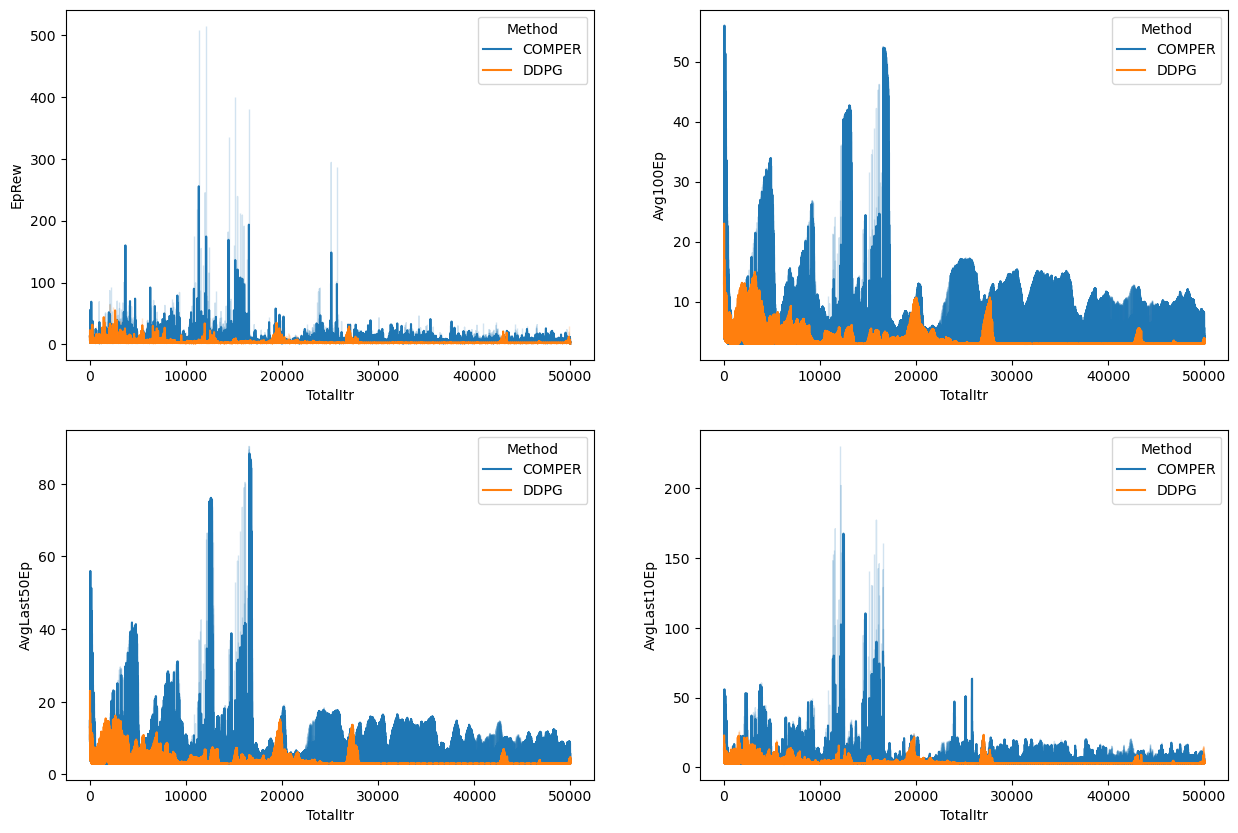

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [9]:
path ='COMPER_DDPG/data_using_done/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,12-09-2023 02:13:52,InvertedPendulum-v4,5000,3.5,COMPER
1,1,12-09-2023 04:18:16,InvertedPendulum-v4,10000,4.5,COMPER
2,1,12-09-2023 06:23:24,InvertedPendulum-v4,15000,3.0,COMPER
3,1,12-09-2023 08:29:40,InvertedPendulum-v4,20000,5.5,COMPER
4,1,12-09-2023 10:36:53,InvertedPendulum-v4,25000,5.5,COMPER


In [10]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,2.740000
std,1.428571,14507.211437,1.161632
min,1.000000,5000.000000,2.000000
25%,2.000000,15000.000000,2.000000
50%,3.000000,27500.000000,2.000000
75%,4.000000,40000.000000,3.000000
max,5.000000,50000.000000,5.500000


In [11]:
path ='DPPG/data_using_done/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,02-10-2023 18:32:09,InvertedPendulum-v4,5000,2.0,DDPG
1,1,02-10-2023 18:42:55,InvertedPendulum-v4,10000,2.0,DDPG
2,1,02-10-2023 18:53:52,InvertedPendulum-v4,15000,2.0,DDPG
3,1,02-10-2023 19:04:53,InvertedPendulum-v4,20000,2.0,DDPG
4,1,02-10-2023 19:15:58,InvertedPendulum-v4,25000,2.0,DDPG


In [12]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,2.120000
std,1.428571,14507.211437,0.423301
min,1.000000,5000.000000,2.000000
25%,2.000000,15000.000000,2.000000
50%,3.000000,27500.000000,2.000000
75%,4.000000,40000.000000,2.000000
max,5.000000,50000.000000,4.500000


In [13]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

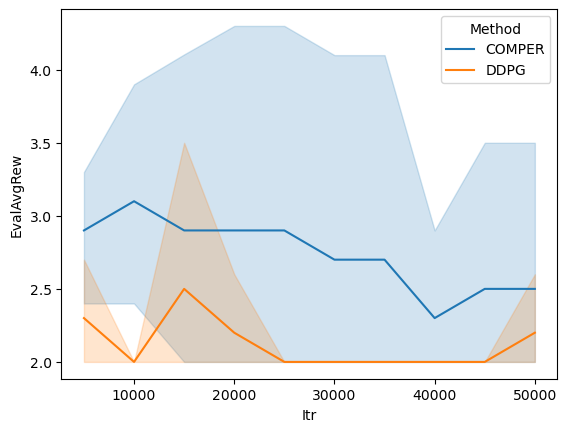

In [14]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [15]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,326,3,COMPER,3.26
100,329,3,COMPER,3.16
101,332,3,COMPER,3.14
102,335,3,COMPER,3.12
103,338,3,COMPER,3.11


In [16]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,729,5,DDPG,7.45
100,734,5,DDPG,7.18
101,740,6,DDPG,7.10
102,745,5,DDPG,7.05
103,750,5,DDPG,7.02


In [17]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,326,3,COMPER,3.26
100,329,3,COMPER,3.16
101,332,3,COMPER,3.14
102,335,3,COMPER,3.12
103,338,3,COMPER,3.11


In [18]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
15206,49992,3,DDPG,3.00
15207,49995,3,DDPG,3.00
15208,49998,3,DDPG,3.00
15209,50000,2,DDPG,2.99
15210,50001,1,DDPG,2.97


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

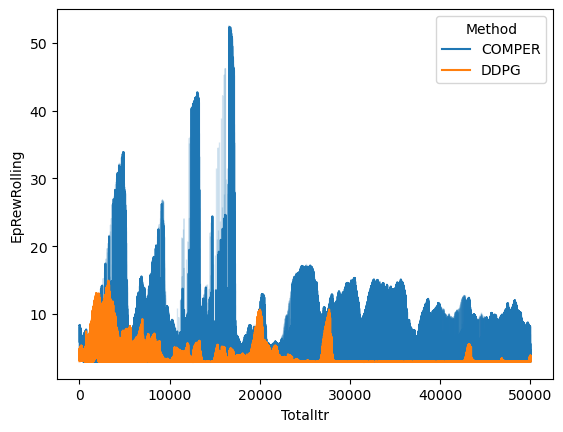

In [19]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [20]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,4.5,COMPER,4.00
2,15000,3.0,COMPER,3.75
3,20000,5.5,COMPER,4.25
4,25000,5.5,COMPER,5.50
5,30000,5.5,COMPER,5.50


In [21]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,2.0,DDPG,2.0
2,15000,2.0,DDPG,2.0
3,20000,2.0,DDPG,2.0
4,25000,2.0,DDPG,2.0
5,30000,2.0,DDPG,2.0


<Axes: xlabel='Int', ylabel='EpRewRolling'>

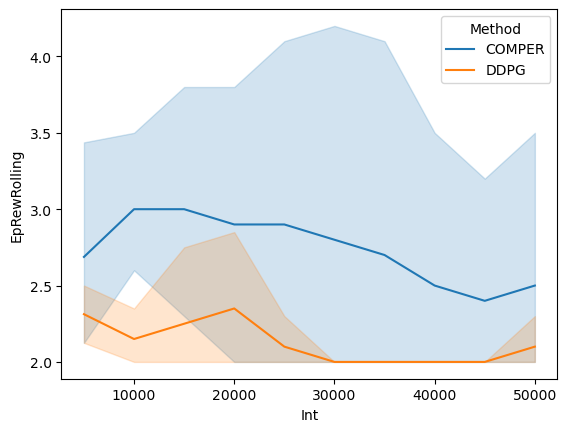

In [22]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

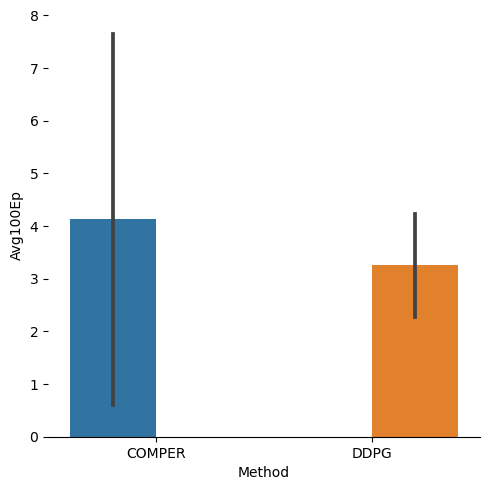

In [23]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

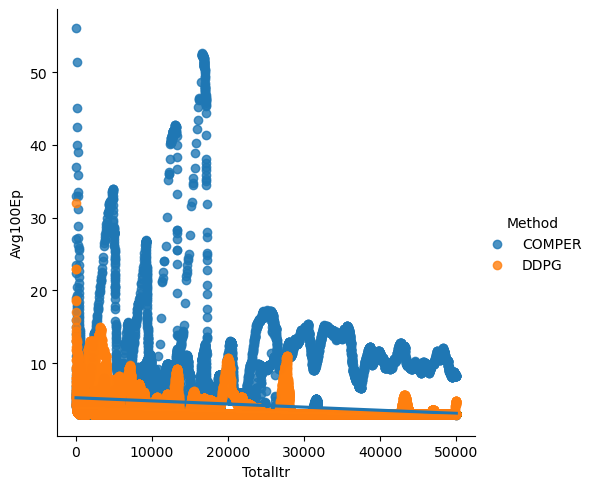

In [24]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)